In [1]:
#importing necessary libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import metrics
import seaborn as sns

In [2]:
#loading the dataset into variable 'data'
data=pd.read_csv('fetal_health.csv')

### Inspecting and preprocessing the data

In [3]:
data.head()

,fhr_baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,fhr_histogram_min,fhr_histogram_max,fhr_histogram_number_of_peaks,fhr_histogram_number_of_zeroes,fhr_histogram_mode,fhr_histogram_mean,fhr_histogram_median,fhr_histogram_variance,fhr_histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [4]:
data.describe()

,fhr_baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,fhr_histogram_min,fhr_histogram_max,fhr_histogram_number_of_peaks,fhr_histogram_number_of_zeroes,fhr_histogram_mode,fhr_histogram_mean,fhr_histogram_median,fhr_histogram_variance,fhr_histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
#to look at the features in the dataset
data.columns

Index(['fhr_baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'fhr_histogram_width',
       'fhr_histogram_min', 'fhr_histogram_max',
       'fhr_histogram_number_of_peaks', 'fhr_histogram_number_of_zeroes',
       'fhr_histogram_mode', 'fhr_histogram_mean', 'fhr_histogram_median',
       'fhr_histogram_variance', 'fhr_histogram_tendency', 'fetal_health'],
      dtype='object')

In [6]:
#to get the number of observations in the different classes
data['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

### Classification using Gaussian Naive Bayes and K-Nearest Neighbours models, without dimensionality reduction using LDA

#### Separation of training and test data

In [7]:
#separating the features and the target variable
features=['fhr_baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'fhr_histogram_width',
       'fhr_histogram_min', 'fhr_histogram_max',
       'fhr_histogram_number_of_peaks', 'fhr_histogram_number_of_zeroes',
       'fhr_histogram_mode', 'fhr_histogram_mean', 'fhr_histogram_median',
       'fhr_histogram_variance', 'fhr_histogram_tendency']
X=data[features]
y=data['fetal_health']

In [8]:
#separating the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Classification using Gaussian Naive Bayes model

In [9]:
#fitting the model training data
gnb = GaussianNB().fit(X_train, y_train)

In [10]:
#making predictions
y_gnb_pred = gnb.predict(X_test)

#### Using performance metrics to evaluate performance

In [11]:
#confusion matrix for test data
metrics.confusion_matrix(y_test, y_gnb_pred)

array([[330,  61,  19],
       [ 10,  59,   3],
       [  2,  14,  34]], dtype=int64)

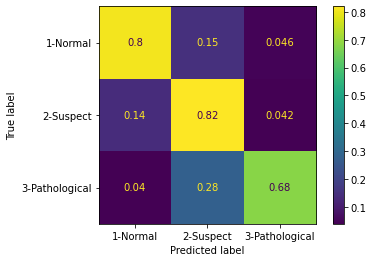

In [12]:
#plotting confusion matrix as a heatmap
metrics.plot_confusion_matrix(gnb, X_test, y_test, normalize='true', display_labels=['1-Normal','2-Suspect','3-Pathological'])

In [13]:
#calculating accuracy score (accuracy = (tp + tn) / (p + n))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 79.51127819548873


In [14]:
#calculating precision score (precision = tp / (tp + fp))
print("Gaussian Naive Bayes model precision (micro, in %):", metrics.precision_score(y_test, y_gnb_pred, average='micro')*100)
print("Gaussian Naive Bayes model precision (macro, in %):", metrics.precision_score(y_test, y_gnb_pred, average='macro')*100)
print("Gaussian Naive Bayes model precision (weighted, in %):", metrics.precision_score(y_test, y_gnb_pred, average='weighted')*100)

Gaussian Naive Bayes model precision (micro, in %): 79.51127819548873
Gaussian Naive Bayes model precision (macro, in %): 67.0784548435766
Gaussian Naive Bayes model precision (weighted, in %): 86.02869745905555


In [15]:
#calculating recall score (recall = tp / (tp + fn))
print("Gaussian Naive Bayes model recall (micro, in %):", metrics.recall_score(y_test, y_gnb_pred, average='micro')*100)
print("Gaussian Naive Bayes model recall (macro, in %):", metrics.recall_score(y_test, y_gnb_pred, average='macro')*100)
print("Gaussian Naive Bayes model recall (weighted, in %):", metrics.recall_score(y_test, y_gnb_pred, average='weighted')*100)

Gaussian Naive Bayes model recall (micro, in %): 79.51127819548873
Gaussian Naive Bayes model recall (macro, in %): 76.8107497741644
Gaussian Naive Bayes model recall (weighted, in %): 79.51127819548873


In [16]:
#calculating f1 score (f1 score = 2 tp / (2 tp + fp + fn))
print("Gaussian Naive Bayes model f1 score (micro, in %):", metrics.f1_score(y_test, y_gnb_pred, average='micro')*100)
print("Gaussian Naive Bayes model f1 score (macro, in %):", metrics.f1_score(y_test, y_gnb_pred, average='macro')*100)
print("Gaussian Naive Bayes model f1 score (weighted, in %):", metrics.f1_score(y_test, y_gnb_pred, average='weighted')*100)

Gaussian Naive Bayes model f1 score (micro, in %): 79.51127819548873
Gaussian Naive Bayes model f1 score (macro, in %): 69.7328180803644
Gaussian Naive Bayes model f1 score (weighted, in %): 81.42079242041918


#### Classification using K-Nearest Neighbours model

In [17]:
#using knn using no. of nearest neighbours = 20
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

In [18]:
#making predictions
y_knn_pred = knn.predict(X_test)

#### Using performance metrics to evaluate performance

In [19]:
#confusion matrix for test data
metrics.confusion_matrix(y_test, y_knn_pred)

array([[393,  14,   3],
       [ 34,  38,   0],
       [ 16,   5,  29]], dtype=int64)

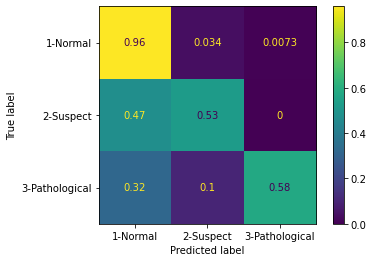

In [20]:
#plotting confusion matrix as a heatmap
metrics.plot_confusion_matrix(knn, X_test, y_test, normalize='true', display_labels=['1-Normal','2-Suspect','3-Pathological'])

In [21]:
#calculating accuracy score (accuracy = (tp + tn) / (p + n))
accuracy = knn.score(X_test, y_test)
print("KNN model accuracy(in %):", accuracy*100)

KNN model accuracy(in %): 86.46616541353383


In [22]:
#calculating precision score (precision = tp / (tp + fp))
print("KNN model precision (micro, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model precision (macro, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model precision (weighted, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model precision (micro, in %): 86.46616541353383
KNN model precision (macro, in %): 82.00166165036367
KNN model precision (weighted, in %): 85.90923025679322


In [23]:
#calculating recall score (recall = tp / (tp + fn))
print("KNN model recall (micro, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model recall (macro, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model recall (weighted, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model recall (micro, in %): 86.46616541353383
KNN model recall (macro, in %): 68.87714543812105
KNN model recall (weighted, in %): 86.46616541353383


In [24]:
#calculating f1 score (f1 score = 2 tp / (2 tp + fp + fn))
print("KNN model f1 score (micro, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model f1 score (macro, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model f1 score (weighted, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model f1 score (micro, in %): 86.46616541353383
KNN model f1 score (macro, in %): 73.93060176137354
KNN model f1 score (weighted, in %): 85.63542713866443


### Classification using Gaussian Naive Bayes and K-Nearest Neighbours models after performing dimensionality reduction using LDA

#### Performing linear discriminant analysis using 1 component

In [25]:
#performing lda on the dataset
#no. of components = 1
lda1 = LinearDiscriminantAnalysis(n_components=1)
X_lda1 = pd.DataFrame(data = lda1.fit_transform(X,y), columns = ['LD1'])

In [26]:
#new axis created
X_lda1.head()

,LD1
0,1.974607
1,-1.681079
2,-1.673487
3,-1.654167
4,-1.764345


In [27]:
#concatenating the target variable column with the linear discriminant column
X_lda1 = pd.concat([X_lda1, data['fetal_health']], axis = 1)
X_lda1.head()

,LD1,fetal_health
0,1.974607,2
1,-1.681079,1
2,-1.673487,1
3,-1.654167,1
4,-1.764345,1


#### Plotting the new subspace with its data points after performing LDA

In [28]:
#creating an array of zeroes for y-axis values in the scatter plot
LD_y = []
for i in range(0, X_lda1.shape[0]):
    LD_y.append(0)

<AxesSubplot:xlabel='LD1'>

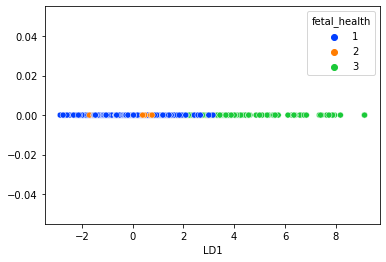

In [29]:
#plotting the points
sns.scatterplot(data = X_lda1, x = 'LD1', y = LD_y, hue = 'fetal_health', palette = 'bright', legend='full')

#### Separation of training and test data

In [30]:
#separating the features and target variable
x_cols = []
for item in list(X_lda1.columns):
    if(item != 'fetal_health'):
        x_cols.append(item)
X1 = X_lda1[x_cols]
y1 = X_lda1['fetal_health']

In [31]:
#splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state = 0)

#### Classification using Gaussian Naive Bayes model

In [32]:
#fitting the model on training data
gnb = GaussianNB().fit(X_train, y_train)

In [33]:
#making predictions
y_gnb_pred = gnb.predict(X_test)

#### Using performance metrics to evaluate performance

In [34]:
#confusion matrix for test data
metrics.confusion_matrix(y_test, y_gnb_pred)

array([[382,  27,   1],
       [ 40,  29,   3],
       [  5,   9,  36]], dtype=int64)

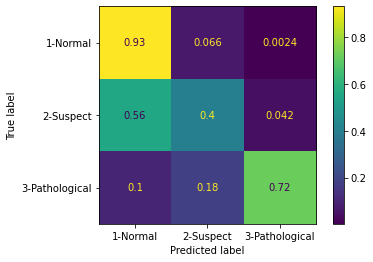

In [35]:
#plotting confusion matrix as a heatmap
metrics.plot_confusion_matrix(gnb, X_test, y_test, normalize='true', display_labels=['1-Normal','2-Suspect','3-Pathological'])

In [36]:
#calculating accuracy score (accuracy = (tp + tn) / (p + n))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 84.02255639097744


In [37]:
#calculating precision score (precision = tp / (tp + fp))
print("Gaussian Naive Bayes model precision (micro, in %):", metrics.precision_score(y_test, y_gnb_pred, average = 'micro')*100)
print("Gaussian Naive Bayes model precision (macro, in %):", metrics.precision_score(y_test, y_gnb_pred, average = 'macro')*100)
print("Gaussian Naive Bayes model precision (weighted, in %):", metrics.precision_score(y_test, y_gnb_pred, average = 'weighted')*100)

Gaussian Naive Bayes model precision (micro, in %): 84.02255639097744
Gaussian Naive Bayes model precision (macro, in %): 74.69224764306732
Gaussian Naive Bayes model precision (weighted, in %): 83.44260263340753


In [38]:
#calculating recall score (recall = tp / (tp + fn))
print("Gaussian Naive Bayes model recall (micro, in %):", metrics.recall_score(y_test, y_gnb_pred, average = 'micro')*100)
print("Gaussian Naive Bayes model recall (macro, in %):", metrics.recall_score(y_test, y_gnb_pred, average = 'macro')*100)
print("Gaussian Naive Bayes model recall (weighted, in %):", metrics.recall_score(y_test, y_gnb_pred, average = 'weighted')*100)

Gaussian Naive Bayes model recall (micro, in %): 84.02255639097744
Gaussian Naive Bayes model recall (macro, in %): 68.48283649503162
Gaussian Naive Bayes model recall (weighted, in %): 84.02255639097744


In [39]:
#calculating f1 score (f1 score = 2 tp / (2 tp + fp + fn))
print("Gaussian Naive Bayes model f1 score (micro, in %):", metrics.f1_score(y_test, y_gnb_pred, average = 'micro')*100)
print("Gaussian Naive Bayes model f1 score (macro, in %):", metrics.f1_score(y_test, y_gnb_pred, average = 'macro')*100)
print("Gaussian Naive Bayes model f1 score (weighted, in %):", metrics.f1_score(y_test, y_gnb_pred, average = 'weighted')*100)

Gaussian Naive Bayes model f1 score (micro, in %): 84.02255639097744
Gaussian Naive Bayes model f1 score (macro, in %): 71.20471385756684
Gaussian Naive Bayes model f1 score (weighted, in %): 83.59456577765478


#### Classification using K-Nearest Neighbours model

In [40]:
#using knn using no. of nearest neighbours = 20
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

In [41]:
#making predictions
y_knn_pred = knn.predict(X_test)

#### Using performance metrics to evaluate performance

In [42]:
#confusion matrix for test data
metrics.confusion_matrix(y_test, y_knn_pred)

array([[389,  20,   1],
       [ 41,  30,   1],
       [  7,  11,  32]], dtype=int64)

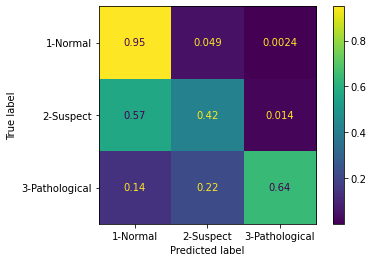

In [43]:
#plotting confusion matrix as a heatmap
metrics.plot_confusion_matrix(knn, X_test, y_test, normalize='true', display_labels=['1-Normal','2-Suspect','3-Pathological'])

In [44]:
#calculating accuracy score (accuracy = (tp + tn) / (p + n))
accuracy = knn.score(X_test, y_test)
print("KNN model accuracy(in %):", accuracy*100)

KNN model accuracy(in %): 84.77443609022556


In [45]:
#calculating precision score (precision = tp / (tp + fp))
print("KNN model precision (micro, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model precision (macro, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model precision (weighted, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model precision (micro, in %): 84.77443609022556
KNN model precision (macro, in %): 77.4379977447707
KNN model precision (weighted, in %): 84.10419824289357


In [46]:
#calculating recall score (recall = tp / (tp + fn))
print("KNN model recall (micro, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model recall (macro, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model recall (weighted, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model recall (micro, in %): 84.77443609022556
KNN model recall (macro, in %): 66.84823848238483
KNN model recall (weighted, in %): 84.77443609022556


In [47]:
#calculating f1 score (f1 score = 2 tp / (2 tp + fp + fn))
print("KNN model f1 score (micro, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model f1 score (macro, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model f1 score (weighted, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model f1 score (micro, in %): 84.77443609022556
KNN model f1 score (macro, in %): 71.05228636329116
KNN model f1 score (weighted, in %): 84.05567762692633


#### Performing linear discriminant analysis using 2 components

In [48]:
#performing lda on the dataset
#no. of components = 2
lda2 = LinearDiscriminantAnalysis(n_components=2)
X_lda2 = pd.DataFrame(data = lda2.fit_transform(X, y), columns = ['LD1', 'LD2'])

In [49]:
#new axes created
X_lda2.head()

,LD1,LD2
0,1.974607,-1.336074
1,-1.681079,0.505350
2,-1.673487,0.275472
3,-1.654167,0.431901
4,-1.764345,1.148967


In [50]:
#concatenating the target variable column with the linear discriminant columns
X_lda2 = pd.concat([X_lda2, data['fetal_health']], axis = 1)
X_lda2.head()

,LD1,LD2,fetal_health
0,1.974607,-1.336074,2
1,-1.681079,0.505350,1
2,-1.673487,0.275472,1
3,-1.654167,0.431901,1
4,-1.764345,1.148967,1


<AxesSubplot:xlabel='LD1', ylabel='LD2'>

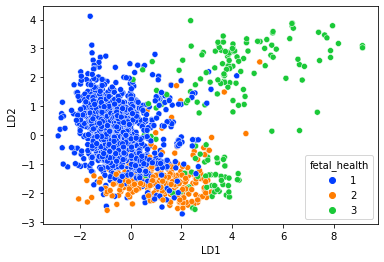

In [51]:
#plotting the points
sns.scatterplot(data = X_lda2, x = 'LD1', y = 'LD2', hue = 'fetal_health', palette = 'bright', legend='full')

#### Separation of training and test data

In [52]:
#separating the features and target variable
x_cols = []
for item in list(X_lda2.columns):
    if(item != 'fetal_health'):
        x_cols.append(item)
X2 = X_lda2[x_cols]
y2 = X_lda2['fetal_health']

In [53]:
#splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state = 0)

#### Classification using Gaussian Naive Bayes model

In [54]:
#fitting the model on training data
gnb = GaussianNB().fit(X_train, y_train)

In [55]:
#making predictions
y_gnb_pred = gnb.predict(X_test)

#### Using performance metrics to evaluate performance

In [56]:
#confusion matrix for test data
metrics.confusion_matrix(y_test, y_gnb_pred)

array([[376,  28,   6],
       [ 22,  49,   1],
       [  5,  13,  32]], dtype=int64)

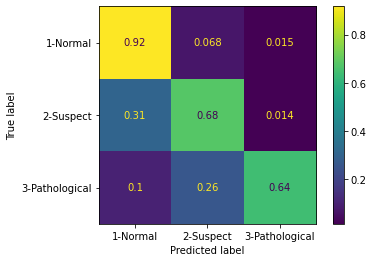

In [57]:
#plotting confusion matrix as a heatmap
metrics.plot_confusion_matrix(gnb, X_test, y_test, normalize='true', display_labels=['1-Normal','2-Suspect','3-Pathological'])

In [58]:
#calculating accuracy score (accuracy = (tp + tn) / (p + n))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 85.90225563909775


In [59]:
#calculating precision score (precision = tp / (tp + fp))
print("Gaussian Naive Bayes model model precision (micro, in %):", metrics.precision_score(y_test, y_gnb_pred, average = 'micro')*100)
print("Gaussian Naive Bayes model model precision (macro, in %):", metrics.precision_score(y_test, y_gnb_pred, average = 'macro')*100)
print("Gaussian Naive Bayes model model precision (weighted, in %):", metrics.precision_score(y_test, y_gnb_pred, average = 'weighted')*100)

Gaussian Naive Bayes model model precision (micro, in %): 85.90225563909775
Gaussian Naive Bayes model model precision (macro, in %): 76.59865821156143
Gaussian Naive Bayes model model precision (weighted, in %): 86.98433428484363


In [60]:
#calculating recall score (recall = tp / (tp + fn))
print("Gaussian Naive Bayes model model recall (micro, in %):", metrics.recall_score(y_test, y_gnb_pred, average = 'micro')*100)
print("Gaussian Naive Bayes model model recall (macro, in %):", metrics.recall_score(y_test, y_gnb_pred, average = 'macro')*100)
print("Gaussian Naive Bayes model model recall (weighted, in %):", metrics.recall_score(y_test, y_gnb_pred, average = 'weighted')*100)

Gaussian Naive Bayes model model recall (micro, in %): 85.90225563909775
Gaussian Naive Bayes model model recall (macro, in %): 74.58762420957544
Gaussian Naive Bayes model model recall (weighted, in %): 85.90225563909775


In [61]:
#calculating f1 score (f1 score = 2 tp / (2 tp + fp + fn))
print("Gaussian Naive Bayes model model f1 score (micro, in %):", metrics.f1_score(y_test, y_gnb_pred, average = 'micro')*100)
print("Gaussian Naive Bayes model model f1 score (macro, in %):", metrics.f1_score(y_test, y_gnb_pred, average = 'macro')*100)
print("Gaussian Naive Bayes model model f1 score (weighted, in %):", metrics.f1_score(y_test, y_gnb_pred, average = 'weighted')*100)

Gaussian Naive Bayes model model f1 score (micro, in %): 85.90225563909775
Gaussian Naive Bayes model model f1 score (macro, in %): 74.96695482976469
Gaussian Naive Bayes model model f1 score (weighted, in %): 86.23082784008544


#### Classification using K-Nearest Neighbours model

In [62]:
#using knn using no. of nearest neighbours = 20
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

In [63]:
#making predictions
y_knn_pred = knn.predict(X_test)

#### Using performance metrics to evaluate performance

In [64]:
#confusion matrix for test data
metrics.confusion_matrix(y_test, y_knn_pred)

array([[393,  15,   2],
       [ 19,  53,   0],
       [  7,   7,  36]], dtype=int64)

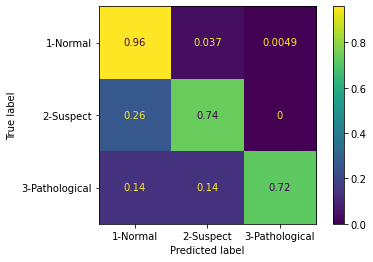

In [65]:
#plotting confusion matrix as a heatmap
metrics.plot_confusion_matrix(knn, X_test, y_test, normalize='true', display_labels=['1-Normal','2-Suspect','3-Pathological'])

In [66]:
#calculating accuracy score (accuracy = (tp + tn) / (p + n))
accuracy = knn.score(X_test, y_test)
print("KNN model accuracy(in %):", accuracy*100)

KNN model accuracy(in %): 90.6015037593985


In [67]:
#calculating precision score (precision = tp / (tp + fp))
print("KNN model precision (micro, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model precision (macro, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model precision (weighted, in %):", metrics.precision_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model precision (micro, in %): 90.6015037593985
KNN model precision (macro, in %): 86.39941939175704
KNN model precision (weighted, in %): 90.75317548991181


In [68]:
#calculating recall score (recall = tp / (tp + fn))
print("KNN model recall (micro, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model recall (macro, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model recall (weighted, in %):", metrics.recall_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model recall (micro, in %): 90.6015037593985
KNN model recall (macro, in %): 80.48825654923215
KNN model recall (weighted, in %): 90.6015037593985


In [69]:
#calculating f1 score (f1 score = 2 tp / (2 tp + fp + fn))
print("KNN model f1 score (micro, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'micro')*100)
print("KNN model f1 score (macro, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'macro')*100)
print("KNN model f1 score (weighted, in %):", metrics.f1_score(y_test, y_knn_pred, average = 'weighted')*100)

KNN model f1 score (micro, in %): 90.6015037593985
KNN model f1 score (macro, in %): 82.91335103328899
KNN model f1 score (weighted, in %): 90.51896090367248
